In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
dataset = pd.read_csv("constructor_standings.csv")
x = dataset.iloc[:, [3,4]].values
y = dataset.iloc[:, -1].values

In [34]:
print(x)

[[14.  1.]
 [ 8.  3.]
 [ 9.  2.]
 ...
 [ 0.  9.]
 [ 0.  9.]
 [ 0.  9.]]


In [35]:
print(y)

[1 0 0 ... 0 0 0]


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0 )


In [37]:
print(x_train)

[[ 86.   1.]
 [  0.  14.]
 [ 16.   3.]
 ...
 [ 12.   3.]
 [367.   2.]
 [ 28.   5.]]


In [38]:
print(x_test)

[[  5.   8.]
 [  0.   6.]
 [  0.  15.]
 ...
 [ 36.   2.]
 [  5.   4.]
 [242.   2.]]


In [39]:
print (y_train)

[8 0 0 ... 0 3 0]


In [40]:
print (y_test)

[0 0 0 ... 2 0 2]


In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
print(x_train)

[[ 0.72601464 -1.43574619]
 [-0.43769098  1.51908765]
 [-0.22118761 -0.98115637]
 ...
 [-0.27531345 -0.98115637]
 [ 4.52835508 -1.20845128]
 [-0.05881008 -0.52656654]]


In [43]:
print(x_test)

[[-0.37003368  0.15531819]
 [-0.43769098 -0.29927163]
 [-0.43769098  1.74638257]
 ...
 [ 0.0494416  -1.20845128]
 [-0.37003368 -0.75386145]
 [ 2.8369225  -1.20845128]]


In [46]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [47]:
y_pred = classifier.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2380   83    8   15    0    0    3    0    0    0    0    0    2    0
     0    0    0]
 [ 162   41    1   10    0    0    0    0    2    0    0    0   38    0
     0    0    0]
 [  78   18    1   13    0    0    3    0    0    0    0    0   36    0
     0    0    0]
 [  19   18    1   14    0    2    3    0    0    0    0    0   23    0
     0    0    0]
 [   3    8    1    6    0    0    2    0    0    0    0    0   25    0
     0    0    0]
 [   1    5    1    5    0    1    3    0    0    0    0    0   28    0
     0    0    0]
 [   0    2    1    2    0    0    0    0    0    0    2    0   25    0
     0    0    0]
 [   0    1    1    3    0    0    0    0    0    0    0    0   19    0
     0    0    0]
 [   0    0    0    1    0    0    0    0    1    0    0    0   23    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0   14    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    1    0    8    0
     0    0    0]
 [   0    

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

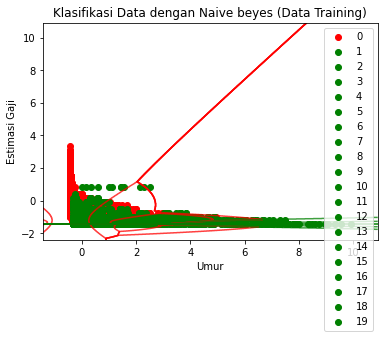

In [49]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop=x_set[:, 0].max() + 1, step=0.01))
plt.contour(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
  
plt.title('Klasifikasi Data dengan Naive beyes (Data Training)')
plt.xlabel('Umur')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()